In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_excel('/content/Base de dados (1).xlsx')

In [ ]:
data

,Country,Region,Rank 2019,Score 2019,GDP 2019,Family 2019,Life Expectancy 2019,Freedom 2019,Trust 2019,Generosity 2019
0,Afghanistan,Southern Asia,154,3.203,0.350,0.517,0.361,0.000,0.025,0.158
1,Albania,Central and Eastern Europe,107,4.719,0.947,0.848,0.874,0.383,0.027,0.178
2,Algeria,Middle East and Northern Africa,88,5.211,1.002,1.160,0.785,0.086,0.114,0.073
3,Argentina,Latin America and Caribbean,47,6.086,1.092,1.432,0.881,0.471,0.050,0.066
4,Armenia,Central and Eastern Europe,116,4.559,0.850,1.055,0.815,0.283,0.064,0.095
...,...,...,...,...,...,...,...,...,...,...
151,Venezuela,Latin America and Caribbean,108,4.707,0.960,1.427,0.805,0.154,0.047,0.064
152,Vietnam,Southeastern Asia,94,5.175,0.741,1.346,0.851,0.543,0.073,0.147
153,Yemen,Middle East and Northern Africa,151,3.380,0.287,1.163,0.463,0.143,0.077,0.108
154,Zambia,Sub-Saharan Africa,138,4.107,0.578,1.058,0.426,0.431,0.087,0.247


In [ ]:
X=data.iloc[:,4:7 ]

In [ ]:
del X['Family 2019']

In [ ]:
X = X.rename(columns={ 'Region':'Região', 'Rank 2019': 'Ranking','Score 2019':'Score','GDP 2019':'PIB per capita','Family 2019': 'Família','Life Expectancy 2019': 'Expectativa de vida', 'Freedom 2019': 'Liberdade', 'Trust 2019': 'Confiança','Country': 'País', 'Generosity 2019': 'Generosidade'})

In [ ]:
X

,PIB per capita,Expectativa de vida
0,0.350,0.361
1,0.947,0.874
2,1.002,0.785
3,1.092,0.881
4,0.850,0.815
...,...,...
151,0.960,0.805
152,0.741,0.851
153,0.287,0.463
154,0.578,0.426


In [ ]:
X

,PIB per capita,Expectativa de vida
0,0.350,0.361
1,0.947,0.874
2,1.002,0.785
3,1.092,0.881
4,0.850,0.815
...,...,...
151,0.960,0.805
152,0.741,0.851
153,0.287,0.463
154,0.578,0.426


In [ ]:
# Variáveis quantitativas para a análise de cluster
quantitative_data = X

# Padronizar os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(quantitative_data)



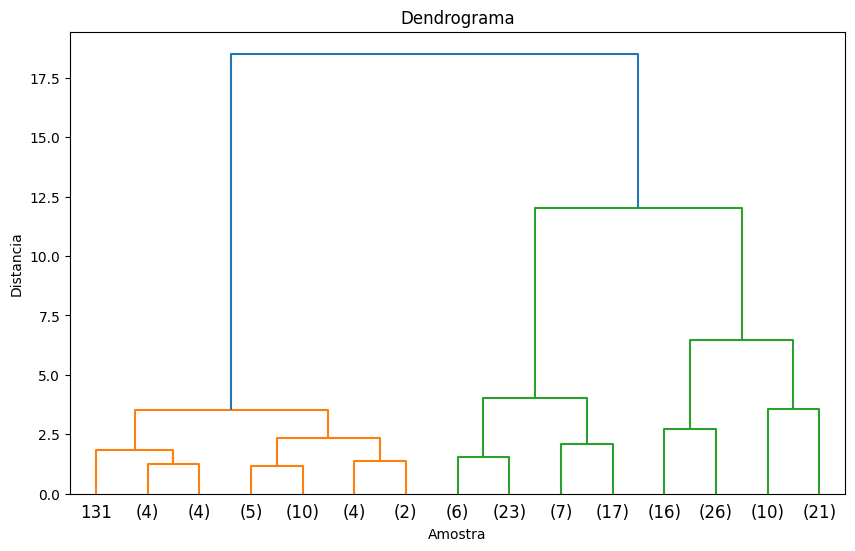

In [ ]:

# Calcular a matriz de linkage
linkage_matrix = linkage(scaled_data, method='ward', metric='euclidean')


# Plotar o dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title('Dendrograma')
plt.xlabel('Amostra')
plt.ylabel('Distancia')
plt.show()


#single: Método da ligação simples (single linkage).
#complete: Método da ligação completa (complete linkage).
#average: Método da média (average linkage).
#centroid: Método do centróide (centroid linkage).



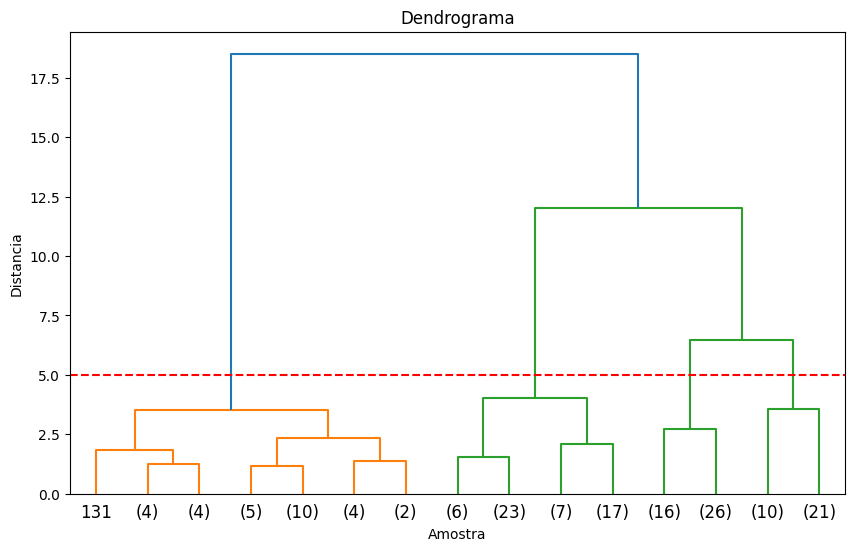

In [ ]:

# Calcular a matriz de linkage
linkage_matrix = linkage(scaled_data, method='ward', metric='euclidean')

# Plotar o dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title('Dendrograma')
plt.xlabel('Amostra')
plt.ylabel('Distancia')
plt.axhline(y=5, color='r', linestyle='--') # Inclui a
plt.show()

In [ ]:

# Com base no dendrograma, escolher o número de clusters
chosen_num_clusters = 3

# Realizar o clustering hierárquico com o número escolhido de clusters
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(linkage_matrix, chosen_num_clusters, criterion='maxclust')


In [ ]:

# Adicionar a coluna de grupos ao DataFrame original
X['Cluster'] = clusters

# Salvar o DataFrame com a marcação dos grupos
X.to_excel('Dados países.xlsx', index=False)

# Análise descritiva: média e quantidade de registros por grupo
grouped_summary = X.groupby('Cluster')[quantitative_data.columns].agg(['mean', 'count'])
print(grouped_summary)


        PIB per capita       Expectativa de vida       Cluster      
                  mean count                mean count    mean count
Cluster                                                             
1             0.314133    30            0.351600    30     1.0    30
2             1.323943    53            0.945981    53     2.0    53
3             0.843973    73            0.718534    73     3.0    73


In [ ]:
X['País']=data['Country']

# Expectativa de vida e PIB per capita baixos

In [ ]:
for idx,row in X.iterrows():
  if row['Cluster']==1:
    print(row['País'])

Afghanistan
Benin
Burkina Faso
Burundi
Cameroon
Central African Republic
Chad
Comoros
Congo (Kinshasa)
Ethiopia
Gambia
Guinea
Haiti
Ivory Coast
Lesotho
Liberia
Madagascar
Malawi
Mali
Mozambique
Niger
Nigeria
Sierra Leone
Somalia
South Sudan
Swaziland
Togo
Uganda
Yemen
Zimbabwe


# Expectativa de vida e PIB per capita altos

In [ ]:
for idx,row in X.iterrows():
  if row['Cluster']==2:
    print(row['País'])

Australia
Austria
Bahrain
Belgium
Canada
Chile
Croatia
Cyprus
Czech Republic
Denmark
Estonia
Finland
France
Germany
Greece
Hong Kong
Hungary
Iceland
Ireland
Israel
Italy
Japan
Kazakhstan
Kuwait
Latvia
Lithuania
Luxembourg
Malaysia
Malta
Netherlands
New Zealand
Northern Cyprus
Norway
Panama
Poland
Portugal
Qatar
Romania
Russia
Saudi Arabia
Singapore
Slovakia
Slovenia
South Korea
Spain
Sweden
Switzerland
Taiwan
Trinidad & Tobago
Turkey
United Arab Emirates
United Kingdom
United States


# Expectativa e PIB per capita médios ("Meio termo")


In [ ]:
for idx,row in X.iterrows():
  if row['Cluster']==3:
    print(row['País'])

Albania
Algeria
Argentina
Armenia
Azerbaijan
Bangladesh
Belarus
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Bulgaria
Cambodia
China
Colombia
Congo (Brazzaville)
Costa Rica
Dominican Republic
Ecuador
Egypt
El Salvador
Gabon
Georgia
Ghana
Guatemala
Honduras
India
Indonesia
Iran
Iraq
Jamaica
Jordan
Kenya
Kosovo
Kyrgyzstan
Laos
Lebanon
Libya
Mauritania
Mauritius
Mexico
Moldova
Mongolia
Montenegro
Morocco
Myanmar
Namibia
Nepal
Nicaragua
North Macedonia
Pakistan
Palestinian Territories
Paraguay
Peru
Philippines
Rwanda
Senegal
Serbia
South Africa
Sri Lanka
Syria
Tajikistan
Tanzania
Thailand
Tunisia
Turkmenistan
Ukraine
Uruguay
Uzbekistan
Venezuela
Vietnam
Zambia


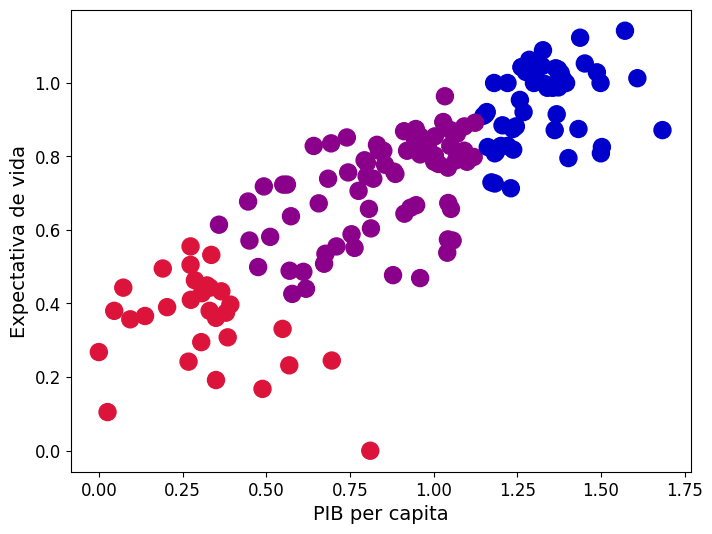

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

blobs = X
colnames = list(blobs.columns[1:-1])
blobs.head()
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=blobs['PIB per capita'], y=blobs['Expectativa de vida'], s=150,
            c=blobs['Cluster'].astype('category'),
            cmap = customcmap)
ax.set_xlabel(r'PIB per capita', fontsize=14)
ax.set_ylabel(r'Expectativa de vida', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
X

,PIB per capita,Expectativa de vida,Cluster,País
0,0.350,0.361,1,Afghanistan
1,0.947,0.874,3,Albania
2,1.002,0.785,3,Algeria
3,1.092,0.881,3,Argentina
4,0.850,0.815,3,Armenia
...,...,...,...,...
151,0.960,0.805,3,Venezuela
152,0.741,0.851,3,Vietnam
153,0.287,0.463,1,Yemen
154,0.578,0.426,3,Zambia
